In [15]:
# importing modules and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing

['13:58.0', '9/15/23 17:13', '348.019529', 14.640777, 121.076253, '4.782371674', '62.24555894', '3.309600914', '1004.257722', '0', '0', '80.68640549', '48.83802414', '51.54444122', '13.83917904', '0', '0', '9', '15', '23', '17', '13']
['13:59.0', '9/15/23 17:13', '349.0195179', 14.640777, 121.076253, '4.784817637', '62.24555894', '3.306063704', '1004.257722', '0', '0', '80.68640549', '48.83802414', '51.54444122', '13.83917904', '0', '0', '9', '15', '23', '17', '13']
['14:00.0', '9/15/23 17:14', '350.0194889', 14.640777, 121.076253, '4.782745719', '62.24555894', '3.309060353', '1004.257722', '0', '0', '80.68640549', '48.83802414', '51.54444122', '13.83917904', '0', '0', '9', '15', '23', '17', '14']
['14:01.0', '9/15/23 17:14', '351.019485', 14.640777, 121.076253, '4.779216192', '62.24555894', '3.314155944', '1004.257722', '0', '0', '80.68640549', '48.83802414', '51.54444122', '13.83917904', '0', '0', '9', '15', '23', '17', '14']
['14:02.0', '9/15/23 17:14', '352.019465', 14.640777, 121.

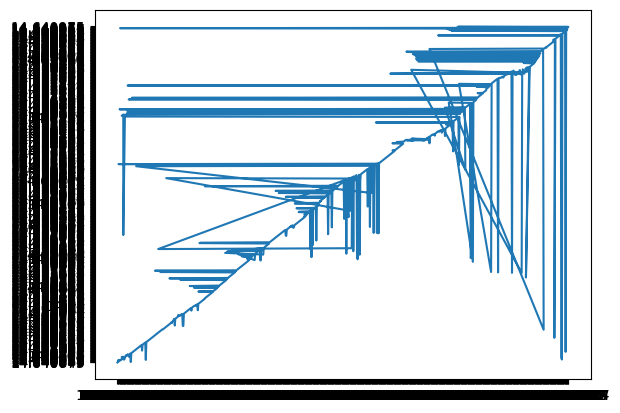

In [28]:
import csv 

# convert to array
with open('../E-Jeep Data/Ejeep Sept 15 v2.csv', 'r') as csv_file:
    csv_reader = csv.reader(csv_file)
    data = list(csv_reader)
    
# remove header
data = data[1:]

data = data[350:]

# convert to float
for i in range(len(data)-1000):
    data[i][3] = float(data[i][3])
    data[i][4] = float(data[i][4])
    
    timelog = data[i][1].replace('/', ' ').replace(':', ' ').split()
    data[i] += timelog
    
    print(data[i])
    
# plot
plt.plot([row[4] for row in data], [row[3] for row in data])
plt.show()

In [17]:
data

[['13:58.0',
  '9/15/23 17:13',
  '348.019529',
  14.640777,
  121.076253,
  '4.782371674',
  '62.24555894',
  '3.309600914',
  '1004.257722',
  '0',
  '0',
  '80.68640549',
  '48.83802414',
  '51.54444122',
  '13.83917904',
  '0',
  '0'],
 ['13:59.0',
  '9/15/23 17:13',
  '349.0195179',
  14.640777,
  121.076253,
  '4.784817637',
  '62.24555894',
  '3.306063704',
  '1004.257722',
  '0',
  '0',
  '80.68640549',
  '48.83802414',
  '51.54444122',
  '13.83917904',
  '0',
  '0'],
 ['14:00.0',
  '9/15/23 17:14',
  '350.0194889',
  14.640777,
  121.076253,
  '4.782745719',
  '62.24555894',
  '3.309060353',
  '1004.257722',
  '0',
  '0',
  '80.68640549',
  '48.83802414',
  '51.54444122',
  '13.83917904',
  '0',
  '0'],
 ['14:01.0',
  '9/15/23 17:14',
  '351.019485',
  14.640777,
  121.076253,
  '4.779216192',
  '62.24555894',
  '3.314155944',
  '1004.257722',
  '0',
  '0',
  '80.68640549',
  '48.83802414',
  '51.54444122',
  '13.83917904',
  '0',
  '0'],
 ['14:02.0',
  '9/15/23 17:14',
  '352

In [20]:
len(data[0][16])



1

In [26]:
x = [1,2,3]
x.append([5,6,7])
x

[1, 2, 3, [5, 6, 7]]